## Import Essential Libraries

In [2]:
import sys
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import collections
import hashlib

time_to_date = lambda t: datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')

In [3]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
# pip install smote_variants

In [5]:
# pip install imbalanced_databases

In [6]:
# pip install imbalanced-learn

In [10]:
pwd

'/Users/lama/Desktop/Columbia-Engineering/Second-Semester/Research/IoT_Packets_Analysis'

## Import Flows

In [11]:
filepath = 'flow_data/samsung_camera_flows.csv'
camera_flows = pd.read_csv(filepath, index_col=None, header=0, delimiter='\t')

filepath2 = 'flow_data/IoTAnalytics-Switch_flows.csv'
switch_flows = pd.read_csv(filepath2, index_col=None, header=0, delimiter='\t')

filepath3 = 'flow_data/MoniotrPublic_tplink_plug_flows.csv'
switch2_flows = pd.read_csv(filepath3, index_col=None, header=0, delimiter='\t')

filepath4 = 'flow_data/MoniotrPublic_cloudcam_flows.csv'
camera2_flows = pd.read_csv(filepath4, index_col=None, header=0, delimiter='\t')


switch_flows["label"] = "Tp-Link plug"
switch2_flows["label"] = "Tp-Link plug"
camera_flows["label"] = "Samsung SmartThings Camera"
camera2_flows["label"] = "Amazon Cloudcam Camera"

## Feature selection 

In [ ]:
# Features which will not be used

pointless_features = ['timeFirst', 'timeLast']

Iot_identity_features = ['dstPort', 'srcPort', 'dstIP', 
                      'dstMac', 'srcIP', 'srcMac', 'srcMac_dstMac_numP']

# Non-decimal features categorized by data-type
hex_features = ['flowStat', 'tcpFStat', 'ipTOS', 'ipFlags', 'ethType',
                 'tcpStates', 'icmpStat', 'icmpTmGtw', 'macStat','tcpAnomaly', 
                'tcpFlags',  'tcpMPF', 'tcpMPTBF', 'tcpMPdssF', 'tcpOptions']


string_features = ['%dir', 'hdrDesc', 'srcManuf_dstManuf', 'dstPortClass', 
                   'srcIPCC', 'dstIPCC', 'dstIPOrg', 'srcIPOrg']

# Not sure what to make of these - more research required
underscore_features = ['ethVlanID','ipOptCpCl_Num', 'icmpBFTypH_TypL_Code', 'ip6OptHH_D', 'ip6OptCntHH_D']

# Features we will use

# features = ['flowInd', 'duration', 'numHdrDesc', 'numHdrs',
#              'l4Proto', 'macPairs', 'dstPortClassN', 'numPktsSnt', 'numPktsRcvd',
#             'numBytesSnt', 'numBytesRcvd', 'minPktSz', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktps', 'bytps',
#             'pktAsm', 'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipOptCnt',
#             'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt', 'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt',
#             'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz', 'tcpWinSzDwnCnt', 'tcpWinSzUpCnt',
#             'tcpWinSzChgDirCnt', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpMSS', 'tcpWS', 'tcpTmS', 'tcpTmER', 'tcpEcI',
#             'tcpBtm', 'tcpSSASAATrip', 'tcpRTTAckTripMin', 'tcpRTTAckTripMax', 'tcpRTTAckTripAve',
#             'tcpRTTAckTripJitAve', 'tcpRTTSseqAA', 'tcpRTTAckJitAve', 'icmpTCcnt', 'icmpEchoSuccRatio', 'icmpPFindex',
#             'connSip', 'connDip', 'connSipDip', 'connSipDprt', 'connF',  'aveIAT', 'maxIAT', 
#                 'minIAT', 'stdIAT', 'tcpISeqN', 'tcpMPAID', 'tcpUtm', 'tcpWinSzThRt','label']


features = ['duration','l4Proto','dstPortClassN','numPktsSnt','numPktsRcvd','numBytesSnt', 'numBytesRcvd',
            'minPktSz', 'maxPktSz', 'avePktSize','pktps', 'bytps','pktAsm', 'bytAsm',
            'connSip', 'connDip', 'connSipDip', 'connSipDprt', 'connF','label']



unused_features = pointless_features + hex_features + string_features + underscore_features 
all_features = features + unused_features

In [ ]:
curl --location -X GET 'https://acmecorp.iot.paloaltonetworks.com/pub/v4.0/device?customerid=acmecorp&deviceid=34:02:86:44:65:36' \
-H 'X-Key-Id: KEY_ID' \
-H 'X-Access-Key: ACCESS_KEY'

In [ ]:
camera_flows[Iot_identity_features]

,dstPort,srcPort,dstIP,dstMac,srcIP,srcMac,srcMac_dstMac_numP
0,443,49613,34.217.170.24,f6:0f:24:e1:12:64,192.168.2.7,e4:26:86:f2:ef:b7,e4:26:86:f2:ef:b7_f6:0f:24:e1:12:64_14
1,49613,443,192.168.2.7,e4:26:86:f2:ef:b7,34.217.170.24,f6:0f:24:e1:12:64,f6:0f:24:e1:12:64_e4:26:86:f2:ef:b7_11
2,443,49617,34.217.170.24,f6:0f:24:e1:12:64,192.168.2.7,e4:26:86:f2:ef:b7,e4:26:86:f2:ef:b7_f6:0f:24:e1:12:64_14
3,49617,443,192.168.2.7,e4:26:86:f2:ef:b7,34.217.170.24,f6:0f:24:e1:12:64,f6:0f:24:e1:12:64_e4:26:86:f2:ef:b7_10
4,443,49624,34.217.170.24,f6:0f:24:e1:12:64,192.168.2.7,e4:26:86:f2:ef:b7,e4:26:86:f2:ef:b7_f6:0f:24:e1:12:64_13
...,...,...,...,...,...,...,...
665,0,0,-,f6:0f:24:e1:12:64,-,e4:26:86:f2:ef:b7,e4:26:86:f2:ef:b7_f6:0f:24:e1:12:64_1
666,443,49629,34.217.170.24,f6:0f:24:e1:12:64,192.168.2.7,e4:26:86:f2:ef:b7,e4:26:86:f2:ef:b7_f6:0f:24:e1:12:64_1110
667,49629,443,192.168.2.7,e4:26:86:f2:ef:b7,34.217.170.24,f6:0f:24:e1:12:64,f6:0f:24:e1:12:64_e4:26:86:f2:ef:b7_1002
668,8556,58871,52.26.219.0,f6:0f:24:e1:12:64,192.168.2.7,e4:26:86:f2:ef:b7,e4:26:86:f2:ef:b7_f6:0f:24:e1:12:64_181195


In [ ]:
camera_flows[features] 

,duration,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,pktps,bytps,pktAsm,bytAsm,connSip,connDip,connSipDip,connSipDprt,connF,label
0,2.470247,6,443,14,11,2091,3570,0,1448,149.357100,5.667449,846.474100,0.120000,-0.261261,4,1,12,12,3.0,0
1,2.405992,6,443,11,14,3570,2091,0,1448,324.545400,4.571918,1483.795000,-0.120000,0.261261,1,4,11,11,11.0,0
2,5.841089,6,443,14,10,2020,4161,0,1448,144.285700,2.396813,345.825900,0.166667,-0.346384,4,1,12,12,3.0,0
3,5.773410,6,443,10,14,4161,2020,0,1448,416.100000,1.732079,720.718000,-0.166667,0.346384,1,4,11,11,11.0,0
4,1.052538,6,443,13,11,2977,4246,0,1448,229.000000,12.351100,2828.401000,0.083333,-0.175689,4,1,10,10,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.000000,0,0,1,0,28,0,28,28,28.000000,0.000000,0.000000,1.000000,1.000000,0,0,0,0,0.0,0
666,1247.760508,6,443,1110,1002,62222,219663,0,1448,56.055850,0.889594,49.866940,0.051136,-0.558529,2,1,2,2,1.0,0
667,1247.692548,6,443,1002,1110,219663,62222,0,1448,219.224500,0.803083,176.055400,-0.051136,0.558529,1,2,1,1,1.0,0
668,956.996398,6,8556,181195,85806,251928940,5635,0,1448,1390.375000,189.337200,263249.600000,0.357261,0.999955,1,1,2,2,2.0,0


In [ ]:
switch_flows[features] 

,duration,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,pktps,bytps,pktAsm,bytAsm,connSip,connDip,connSipDip,connSipDprt,connF,label
0,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.00,0.000000,0,0,0,0,0.0,1
1,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.00,0.000000,0,0,0,0,0.0,1
2,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.00,0.000000,0,0,0,0,0.0,1
3,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.00,0.000000,0,0,0,0,0.0,1
4,0.000000,0,0,1,0,99,0,99,99,99.0000,0.000000,0.000000,1.00,1.000000,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,946.066905,6,50443,20,12,1545,4253,0,554,77.2500,0.021140,1.633077,0.25,-0.467058,1,1,2,2,2.0,1
988,945.825290,6,50443,12,20,4253,1545,0,1448,354.4167,0.012687,4.496602,-0.25,0.467058,1,1,1,1,1.0,1
989,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.00,0.000000,0,0,0,0,0.0,1
990,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.00,0.000000,0,0,0,0,0.0,1


In [ ]:
# switch2_flows[features]

In [ ]:
# testing_flows[features].describe()

In [ ]:
flows = pd.concat([camera2_flows[features], switch_flows[features]], axis=0, ignore_index=True)
flows

,duration,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,pktps,bytps,pktAsm,bytAsm,connSip,connDip,connSipDip,connSipDprt,connF,label
0,0.000000,6,443,1,0,0,0,0,0,0.0000,0.000000,0.000000,1.000000,0.000000,1,3,1,5,5.0,0
1,150.488862,6,443,12,7,4254,2274,0,709,354.5000,0.079740,28.267870,0.263158,0.303309,5,1,4,6,1.2,0
2,306.344473,6,443,7,12,2274,4254,0,379,324.8571,0.022850,7.423016,-0.263158,-0.303309,1,5,3,5,5.0,0
3,0.617576,6,443,13,10,1751,5434,0,1341,134.6923,21.050040,2835.279000,0.130435,-0.512596,6,1,2,6,1.0,0
4,0.603082,6,443,10,13,5434,1751,0,1576,543.4000,16.581490,9010.384000,-0.130435,0.512596,1,6,1,5,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,946.066905,6,50443,20,12,1545,4253,0,554,77.2500,0.021140,1.633077,0.250000,-0.467058,1,1,2,2,2.0,1
1911,945.825290,6,50443,12,20,4253,1545,0,1448,354.4167,0.012687,4.496602,-0.250000,0.467058,1,1,1,1,1.0,1
1912,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.0,1
1913,0.000000,0,0,1,1,28,28,28,28,28.0000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.0,1


In [ ]:
test_flows = pd.concat([camera_flows[features], switch2_flows[features]], axis=0, ignore_index=True)
test_flows

,duration,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,pktps,bytps,pktAsm,bytAsm,connSip,connDip,connSipDip,connSipDprt,connF,label
0,2.470247,6,443,14,11,2091,3570,0,1448,149.35710,5.667449,846.474100,0.120000,-0.261261,4,1,12,12,3.0,0
1,2.405992,6,443,11,14,3570,2091,0,1448,324.54540,4.571918,1483.795000,-0.120000,0.261261,1,4,11,11,11.0,0
2,5.841089,6,443,14,10,2020,4161,0,1448,144.28570,2.396813,345.825900,0.166667,-0.346384,4,1,12,12,3.0,0
3,5.773410,6,443,10,14,4161,2020,0,1448,416.10000,1.732079,720.718000,-0.166667,0.346384,1,4,11,11,11.0,0
4,1.052538,6,443,13,11,2977,4246,0,1448,229.00000,12.351100,2828.401000,0.083333,-0.175689,4,1,10,10,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.000000,17,67,1,1,301,548,301,301,301.00000,0.000000,0.000000,0.000000,-0.290930,1,2,1,1,1.0,1
1134,0.264204,0,0,2,2,56,92,28,28,28.00000,7.569908,211.957400,0.000000,-0.243243,0,0,0,0,0.0,1
1135,0.253250,0,0,2,2,92,56,46,46,46.00000,7.897335,363.277400,0.000000,0.243243,0,0,0,0,0.0,1
1136,32278.570395,6,443,276,140,8788,7960,0,64,31.84058,0.008551,0.272255,0.326923,0.049439,1,1,2,2,2.0,1


In [ ]:
# testing_flows[features]

## ML

In [ ]:
X_train = flows.iloc[:, flows.columns != 'label']
y_train = flows.iloc[:, flows.columns == 'label']

# oversample = SMOTE()
# X_train, y_train= oversample.fit_resample(X_train, y_train)

In [ ]:
X_test = test_flows.iloc[:, test_flows.columns != 'label']
y_test = test_flows.iloc[:, test_flows.columns == 'label']

# oversample = SMOTE()
# X_test, y_test= oversample.fit_resample(X_test, y_test)

In [ ]:
# reg = LassoCV()
# reg.fit(X_train, y_train)
# print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
# print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
# coef = pd.Series(reg.coef_, index = X_train.columns)

In [ ]:
# features_selected = []
# for i, v in coef.items():
#     if(v!=0):
#         features_selected.append(i)
# features_selected    

In [ ]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
# imp_coef = coef.sort_values()
# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Feature importance using Lasso Model")

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

/Users/lama/python/miniconda3/envs/packets/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()

array([False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [ ]:
print(selected_feat)

Index(['l4Proto', 'dstPortClassN', 'maxPktSz', 'connSip', 'connDip',
       'connSipDip', 'connSipDprt', 'connF'],
      dtype='object')


In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()
# # fit the model
# model.fit(X_train, y_train)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# impList = zip(X_train.columns, importance)
# for feature in sorted(impList, key = lambda t: t[1], reverse=True):
#     print(feature)

## End of feature selection 

In [ ]:
# splitting and normalizing dataset.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1915, 19)
Training Labels Shape: (1138, 19)
Testing Features Shape: (1915, 1)
Testing Labels Shape: (1138, 1)


In [ ]:
# Used to plot the roc curve.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))


  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/Users/lama/python/miniconda3/envs/packets/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion matrix:
 [[499 171]
 [  2 466]]


/Users/lama/python/miniconda3/envs/packets/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/lama/python/miniconda3/envs/packets/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


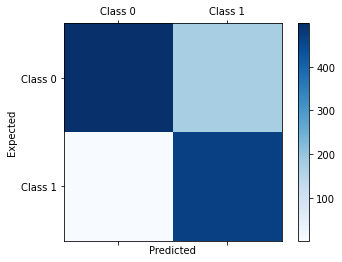

Accuracy 0.8479789103690686
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       670
           1       0.73      1.00      0.84       468

    accuracy                           0.85      1138
   macro avg       0.86      0.87      0.85      1138
weighted avg       0.89      0.85      0.85      1138

AUC Score: 
0.8702513075647403


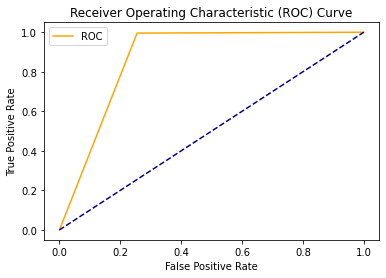

In [ ]:
classif_results()

In [ ]:


# kf = KFold(n_splits=10)
# kf.get_n_splits(X)
# fold_num = 1

# # 10-Fold Cross-Validation of Decision Tree Classifier
# for train_index, test_index in kf.split(X):
#     print("\nResults for Fold #", fold_num)
#     print("TRAIN:", train_index, "   TEST:", test_index)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     dtree = DecisionTreeClassifier()
#     dtree.fit(X_train, y_train)
#     y_predict = dtree.predict(X_test)
#     print("Accuracy Score: ", dtree.score(X_test, y_test))
#     print(cfmat(y_test, y_predict))
#     fold_num += 1

